In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

In [20]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [21]:
#load mnist dataset
from keras.datasets import mnist
(x_tr, y_tr), (x_t, y_t) = mnist.load_data()

In [22]:
#check shape of input size and target
print("Shape of input:")
print(x_tr.shape)
print("Shape of target:")
print(y_tr.shape)
print("Shape of test input:")
print(x_t.shape)
print("Shape of test target:")
print(y_t.shape)

Shape of input:
(60000, 28, 28)
Shape of target:
(60000,)
Shape of test input:
(10000, 28, 28)
Shape of test target:
(10000,)


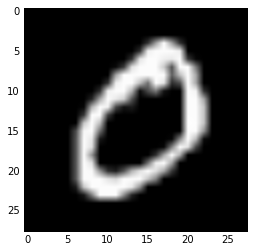

In [23]:
plt.imshow(x_tr[1], cmap='gray')
plt.show()

In [24]:
#transform data , define depth =1 for grayscale images
x_tr = x_tr.reshape(x_tr.shape[0], 1, 28, 28)
x_t = x_t.reshape(x_t.shape[0], 1, 28, 28)

In [25]:
print(type(x_tr))

<type 'numpy.ndarray'>


In [26]:
#convert data type into float 
x_tr = x_tr.astype('float32')
x_t = x_t.astype('float32')
x_tr /= 255
x_t /= 255

In [27]:
#convert labels into one-hot vector
y_tr = np_utils.to_categorical(y_tr, 10)
y_t = np_utils.to_categorical(y_t, 10)

In [28]:
print(y_tr[1])

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [29]:
#model

model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu', input_shape=(1,28,28), dim_ordering='th'))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", data_format="channels_first", input_shape=(1, 28, 28...)`
  after removing the cwd from sys.path.


In [ ]:
#compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
import time
t1 = time.time()
model.fit(x_tr, y_tr,
         batch_size=32, nb_epoch=20, verbose=1)

t2 = time.time()
print("time taken in trainig:")
print((t2-t1)/100.0)

Epoch 1/20
60000/60000 [==============================] - 22s - loss: 0.2835 - acc: 0.9143    
Epoch 2/20
60000/60000 [==============================] - 22s - loss: 0.1112 - acc: 0.9679    
Epoch 3/20
60000/60000 [==============================] - 22s - loss: 0.0824 - acc: 0.9757    
Epoch 4/20
60000/60000 [==============================] - 22s - loss: 0.0690 - acc: 0.9790    
Epoch 5/20
60000/60000 [==============================] - 22s - loss: 0.0597 - acc: 0.9819    
Epoch 6/20
60000/60000 [==============================] - 22s - loss: 0.0510 - acc: 0.9844    
Epoch 7/20
60000/60000 [==============================] - 22s - loss: 0.0478 - acc: 0.9852    
Epoch 8/20
60000/60000 [==============================] - 22s - loss: 0.0419 - acc: 0.9868    
Epoch 9/20
60000/60000 [==============================] - 21s - loss: 0.0399 - acc: 0.9876    
Epoch 10/20
60000/60000 [==============================] - 21s - loss: 0.0365 - acc: 0.9884    
Epoch 11/20
60000/60000 [========================

In [ ]:
score = model.evaluate(x_t, y_t, verbose=0)


In [ ]:
print(score)